# Proyecto final: módulo de deep learning

## Descarga de datos e imágenes

In [1]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-11 12:24:43--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [               <=>  ]  52.85M  2.80MB/s    in 20s     

2024-03-11 12:25:05 (2.70 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [9]:
import cv2
import numpy
import pandas
import imageio.v3 as io
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.optimizers import Adam

from typing import Optional, Union

In [3]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15978889,https://www.airbnb.com/rooms/15978889,20170407214119,2017-04-08,Habitación tranquila y encantadora en el centro.,Casa en un precioso edificio a cinco minutos d...,NaN,Casa en un precioso edificio a cinco minutos d...,none,NaN,...,7.0,9.0,10.0,NaN,NaN,moderate,1,1.09,"40.410795802319505,-3.6988710848398125","Host Has Profile Pic,Is Location Exact,Require..."
1,7453640,https://www.airbnb.com/rooms/7453640,20170407214119,2017-04-08,Apartamento entre Palacio y Latina,Original apartamento muy céntrico situado a 5...,Apartamento situado en pleno casco histórico d...,Original apartamento muy céntrico situado a 5...,none,"Estamos en el barrio de Palacio, en la cornisa...",...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.52,"40.41098192457535,-3.7140278239372293","Host Is Superhost,Host Has Profile Pic,Is Loca..."
2,15822767,https://www.airbnb.com/rooms/15822767,20170407214119,2017-04-08,Habitación en amplio piso en Arturo Soria,Alquilo 2 habitaciones amplias en mi casa (yo...,"Cerca del Aeropuerto, de IFEMA, a 4 minutos an...",Alquilo 2 habitaciones amplias en mi casa (yo...,none,"Comunidad pequeña, sólo 15 vecinos",...,10.0,10.0,9.0,NaN,NaN,moderate,2,0.50,"40.45049400161386,-3.6546539226941372","Host Has Profile Pic,Host Identity Verified,Is..."
3,18100901,https://www.airbnb.com/rooms/18100901,20170407214119,2017-04-08,Habitación Doble,Habitación Doble. Baño privado Cama de 135 cm...,NaN,Habitación Doble. Baño privado Cama de 135 cm...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,3,NaN,"40.420110490218754,-3.698915199489551","Host Has Profile Pic,Is Location Exact,Require..."
4,13732505,https://www.airbnb.com/rooms/13732505,20170407214119,2017-04-08,"Piso cerca centro, acogedor, reformado, hab in...","Piso de 110 m2 con 4 hab, 2baños, salón, cocin...",NaN,"Piso de 110 m2 con 4 hab, 2baños, salón, cocin...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,4,NaN,"40.399729732271275,-3.6971428135045743","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:
        pass
  return images[downloaded_idxs], downloaded_idxs

### Imágenes y datos desde Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pandas.read_csv("/content/drive/my-drive/data_KC.csv", sep=';')
images = numpy.load("/content/drive/my-drive/images_KC.npy")
data.shape, images.shape

((2982, 89), (2982, 224, 224, 3))

In [7]:
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15978889,https://www.airbnb.com/rooms/15978889,20170407214119,2017-04-08,Habitación tranquila y encantadora en el centro.,Casa en un precioso edificio a cinco minutos d...,NaN,Casa en un precioso edificio a cinco minutos d...,none,NaN,...,7.0,9.0,10.0,NaN,NaN,moderate,1,1.09,"40.410795802319505,-3.6988710848398125","Host Has Profile Pic,Is Location Exact,Require..."
1,7453640,https://www.airbnb.com/rooms/7453640,20170407214119,2017-04-08,Apartamento entre Palacio y Latina,Original apartamento muy céntrico situado a 5...,Apartamento situado en pleno casco histórico d...,Original apartamento muy céntrico situado a 5...,none,"Estamos en el barrio de Palacio, en la cornisa...",...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.52,"40.41098192457535,-3.7140278239372293","Host Is Superhost,Host Has Profile Pic,Is Loca..."
2,15822767,https://www.airbnb.com/rooms/15822767,20170407214119,2017-04-08,Habitación en amplio piso en Arturo Soria,Alquilo 2 habitaciones amplias en mi casa (yo...,"Cerca del Aeropuerto, de IFEMA, a 4 minutos an...",Alquilo 2 habitaciones amplias en mi casa (yo...,none,"Comunidad pequeña, sólo 15 vecinos",...,10.0,10.0,9.0,NaN,NaN,moderate,2,0.50,"40.45049400161386,-3.6546539226941372","Host Has Profile Pic,Host Identity Verified,Is..."
3,18100901,https://www.airbnb.com/rooms/18100901,20170407214119,2017-04-08,Habitación Doble,Habitación Doble. Baño privado Cama de 135 cm...,NaN,Habitación Doble. Baño privado Cama de 135 cm...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,3,NaN,"40.420110490218754,-3.698915199489551","Host Has Profile Pic,Is Location Exact,Require..."
4,13732505,https://www.airbnb.com/rooms/13732505,20170407214119,2017-04-08,"Piso cerca centro, acogedor, reformado, hab in...","Piso de 110 m2 con 4 hab, 2baños, salón, cocin...",NaN,"Piso de 110 m2 con 4 hab, 2baños, salón, cocin...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,4,NaN,"40.399729732271275,-3.6971428135045743","Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
numpy.save('images_KC.npy', images)
data.to_csv('data_KC.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images_KC.npy /content/drive/my-drive/images_KC.npy
!cp data_KC.csv /content/drive/my-drive/data_KC.csv

!ls -lah images* data*

-rw-r--r-- 1 root root  12M Mar  4 03:28 data_KC.csv
-rw-r--r-- 1 root root 1.7G Mar  4 03:28 images_KC.npy


El método utilizado se basa en establecer umbrales diferentes para la clasificación, asegurando que cada clase tenga aproximadamente la misma cantidad de muestras. Se asume un conocimiento experto para establecer estos umbrales de manera fija. Cambiamos la tarea que era de regresión (predecir un precio), en una tarea de clasificación.

<Axes: >

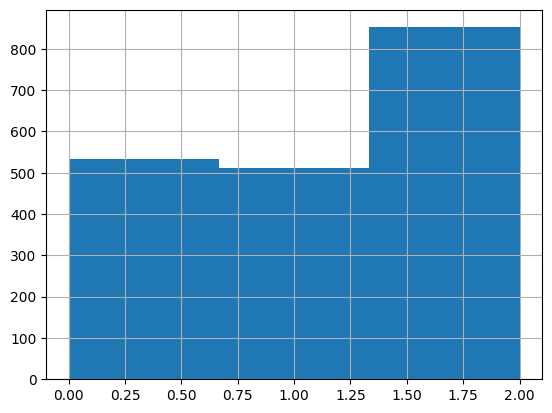

In [8]:
y_class = []
for y in data['Price']:
  if y <= 32:
    y_class.append(0)
  elif 32 < y <= 55:
    y_class.append(1)
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)

In [9]:
y_class.index = data.index

In [10]:
ground_truth = data['Price']

<Axes: >

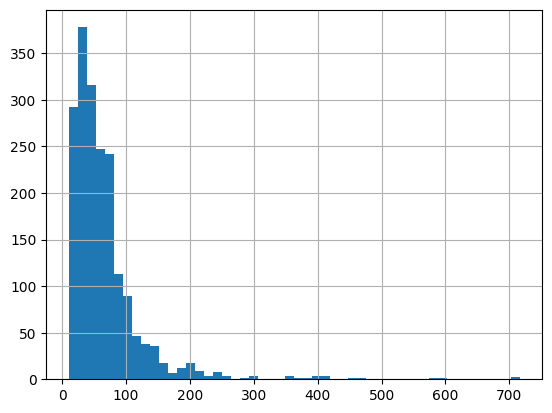

In [11]:
ground_truth.hist(bins=50)

comparar todos nuestros modelos, seleccionamos las particiones.

In [12]:
train_df, test_df, train_y, test_y = train_test_split(data, y_class,
                                                      test_size=0.25,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_class)
train_df, val_df, train_y, val_y = train_test_split(train_df, train_y,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=train_y)

print(train_df.shape, val_df.shape, test_df.shape)
print(train_y.shape, val_y.shape, test_y.shape)

(1209, 89) (214, 89) (475, 89)
(1209,) (214,) (475,)


In [13]:
train_idx, val_idx, test_idx = train_df.index, val_df.index, test_df.index
print(data.loc[train_idx].shape)
print(y_class.loc[train_idx].shape)

(1209, 89)
(1209,)


Preprocesado de los datos




Datos numéricos

In [14]:
numerical_cols = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Host Total Listings Count']
data[numerical_cols].shape

(1898, 10)

In [16]:
scaler = StandardScaler()

train_num = pandas.DataFrame(scaler.fit_transform(train_df[numerical_cols]),
                             columns=numerical_cols)
val_num = pandas.DataFrame(scaler.transform(val_df[numerical_cols]),
                             columns=numerical_cols)
test_num = pandas.DataFrame(scaler.transform(test_df[numerical_cols]),
                             columns=numerical_cols)
numerical_data = pandas.concat([train_num, val_num, test_num], axis=0)
numerical_data.index = data.index
numerical_data.shape

(1898, 10)

Datos categóricos

posibles categorías y convertir en one-hot

In [17]:
categorical_cols = ['Property Type', 'Room Type', 'Cancellation Policy']
data[categorical_cols].head(5)

,Property Type,Room Type,Cancellation Policy
0,Apartment,Private room,moderate
1,Apartment,Entire home/apt,moderate
2,Condominium,Private room,moderate
3,Hostel,Private room,flexible
4,House,Private room,flexible


In [18]:
property_type = pandas.get_dummies(data[['Property Type']], prefix='Property_Type')
room_type = pandas.get_dummies(data[['Room Type']], prefix='Room Type')
canc_pol = pandas.get_dummies(data['Cancellation Policy'], prefix='Cancellation_Policy')

categorical_data = pandas.concat([property_type, room_type, canc_pol], axis=1, join='inner')
categorical_data.shape

(1898, 22)

Fusión numéricos y categóricos

In [19]:
data = pandas.concat([numerical_data, categorical_data], axis=1)
data

,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Host Total Listings Count,...,Property_Type_Other,Property_Type_Townhouse,Property_Type_Villa,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Cancellation_Policy_flexible,Cancellation_Policy_moderate,Cancellation_Policy_strict,Cancellation_Policy_super_strict_60
0,-0.557455,-0.428039,-0.350560,-0.611815,-0.468565,-0.617026,-0.628790,0.265873,-0.640287,-0.334323,...,0,0,0,0,1,0,0,1,0,0
1,1.517874,-0.428039,0.889249,0.733508,2.038051,0.689427,-0.222045,0.265873,6.092018,-0.219698,...,0,0,0,1,0,0,0,1,0,0
2,-0.557455,-0.428039,-0.350560,-0.611815,-0.468565,0.253942,-0.222045,-0.855433,-0.128632,-0.334323,...,0,0,0,0,1,0,0,1,0,0
3,-1.076288,-0.428039,-0.350560,-0.611815,-0.468565,-0.617026,0.184701,-0.855433,0.113731,-0.334323,...,0,0,0,0,1,0,1,0,0,0
4,-0.557455,-0.428039,-1.590368,-0.611815,0.366974,-0.181542,-0.628790,0.265873,-0.586429,0.955208,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,-0.557455,-0.428039,-0.350560,-0.611815,-0.468565,-0.617026,0.184701,-0.760322,-0.263278,-0.305666,...,0,0,0,1,0,0,0,0,1,0
1894,-1.076288,1.106778,-0.350560,-0.611815,-0.468565,1.037814,-0.222045,-0.815386,-0.209420,-0.191042,...,0,0,0,0,1,0,1,0,0,0
1895,-0.557455,-0.428039,-0.350560,-0.611815,-0.468565,-0.617026,-0.628790,0.265873,-0.640287,-0.334323,...,0,0,0,1,0,0,0,1,0,0
1896,-1.076288,-0.428039,-0.350560,-0.611815,-0.468565,1.037814,-0.222045,-0.854432,-0.317137,-0.191042,...,0,0,0,0,1,0,1,0,0,0


In [20]:
data.isna().sum() #NAs

Accommodates                           0
Bathrooms                              8
Bedrooms                               6
Beds                                   5
Guests Included                        0
Extra People                           0
Minimum Nights                         0
Maximum Nights                         0
Number of Reviews                      0
Host Total Listings Count              1
Property_Type_Apartment                0
Property_Type_Bed & Breakfast          0
Property_Type_Boutique hotel           0
Property_Type_Camper/RV                0
Property_Type_Chalet                   0
Property_Type_Condominium              0
Property_Type_Dorm                     0
Property_Type_Earth House              0
Property_Type_Guesthouse               0
Property_Type_Hostel                   0
Property_Type_House                    0
Property_Type_Loft                     0
Property_Type_Other                    0
Property_Type_Townhouse                0
Property_Type_Vi

In [21]:
cols2fill = ['Bathrooms', 'Bedrooms', 'Beds', 'Host Total Listings Count']
for col in cols2fill:
  data[col] = data[col].fillna(data[col].mean())

In [22]:
data.isna().sum()

Accommodates                           0
Bathrooms                              0
Bedrooms                               0
Beds                                   0
Guests Included                        0
Extra People                           0
Minimum Nights                         0
Maximum Nights                         0
Number of Reviews                      0
Host Total Listings Count              0
Property_Type_Apartment                0
Property_Type_Bed & Breakfast          0
Property_Type_Boutique hotel           0
Property_Type_Camper/RV                0
Property_Type_Chalet                   0
Property_Type_Condominium              0
Property_Type_Dorm                     0
Property_Type_Earth House              0
Property_Type_Guesthouse               0
Property_Type_Hostel                   0
Property_Type_House                    0
Property_Type_Loft                     0
Property_Type_Other                    0
Property_Type_Townhouse                0
Property_Type_Vi

Datos tabulares

Normalización entre 0 y 1los campos.

In [23]:
data.max(axis=0)

Accommodates                            6.706199
Bathrooms                              10.315685
Bedrooms                               10.807719
Beds                                    9.478106
Guests Included                        12.064516
Extra People                           22.986224
Minimum Nights                          9.133101
Maximum Nights                         29.174539
Number of Reviews                       8.623364
Host Total Listings Count               5.568860
Property_Type_Apartment                 1.000000
Property_Type_Bed & Breakfast           1.000000
Property_Type_Boutique hotel            1.000000
Property_Type_Camper/RV                 1.000000
Property_Type_Chalet                    1.000000
Property_Type_Condominium               1.000000
Property_Type_Dorm                      1.000000
Property_Type_Earth House               1.000000
Property_Type_Guesthouse                1.000000
Property_Type_Hostel                    1.000000
Property_Type_House 

In [24]:
mm_scaler = MinMaxScaler()
cols = data.columns

train_X = pandas.DataFrame(mm_scaler.fit_transform(data.loc[train_idx]),
                           columns=cols)
val_X = pandas.DataFrame(mm_scaler.transform(data.loc[val_idx]),
                             columns=cols)
test_X = pandas.DataFrame(mm_scaler.transform(data.loc[test_idx]),
                             columns=cols)

In [25]:
train_X.max(axis=0)

Accommodates                           1.0
Bathrooms                              1.0
Bedrooms                               1.0
Beds                                   1.0
Guests Included                        1.0
Extra People                           1.0
Minimum Nights                         1.0
Maximum Nights                         1.0
Number of Reviews                      1.0
Host Total Listings Count              1.0
Property_Type_Apartment                1.0
Property_Type_Bed & Breakfast          1.0
Property_Type_Boutique hotel           1.0
Property_Type_Camper/RV                1.0
Property_Type_Chalet                   1.0
Property_Type_Condominium              1.0
Property_Type_Dorm                     1.0
Property_Type_Earth House              1.0
Property_Type_Guesthouse               1.0
Property_Type_Hostel                   1.0
Property_Type_House                    1.0
Property_Type_Loft                     1.0
Property_Type_Other                    1.0
Property_Ty

Clasificación tabulares

In [26]:
#Pasar a onehot
train_y_cls = to_categorical(y_class.loc[train_idx])
val_y_cls = to_categorical(y_class.loc[val_idx])
test_y_cls = to_categorical(y_class.loc[test_idx])

train_y_cls.shape, val_y_cls.shape, test_y_cls.shape

((1209, 3), (214, 3), (475, 3))

In [27]:
print(f"Input size: {data.shape[1]}")

nb_out = train_y_cls.shape[1]
classifier1D = Sequential()
classifier1D.add(Dense(64, input_shape=(data.shape[1],), activation='relu'))
classifier1D.add(Dense(32, activation='relu'))
classifier1D.add(Dense(8, activation='relu'))
classifier1D.add(Dense(nb_out, activation='softmax'))

classifier1D.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

classifier1D.summary()

Input size: 32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 4483 (17.51 KB)
Trainable params: 4483 (17.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
EPOCHS = 15
BS = 32

H = classifier1D.fit(x=train_X, y=train_y_cls, batch_size=BS, epochs=EPOCHS,
          validation_data=(val_X, val_y_cls), shuffle=True, verbose=1)

Epoch 1/15
38/38 [==============================] - 3s 11ms/step - loss: 1.0349 - accuracy: 0.6203 - val_loss: 0.9801 - val_accuracy: 0.6729
Epoch 2/15
38/38 [==============================] - 0s 5ms/step - loss: 0.8936 - accuracy: 0.6791 - val_loss: 0.8424 - val_accuracy: 0.6729
Epoch 3/15
38/38 [==============================] - 0s 4ms/step - loss: 0.7803 - accuracy: 0.6799 - val_loss: 0.7873 - val_accuracy: 0.6729
Epoch 4/15
38/38 [==============================] - 0s 4ms/step - loss: 0.7446 - accuracy: 0.6791 - val_loss: 0.7619 - val_accuracy: 0.6729
Epoch 5/15
38/38 [==============================] - 0s 4ms/step - loss: 0.7327 - accuracy: 0.6791 - val_loss: 0.7603 - val_accuracy: 0.6729
Epoch 6/15
38/38 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.6840 - val_loss: 0.7529 - val_accuracy: 0.6729
Epoch 7/15
38/38 [==============================] - 0s 5ms/step - loss: 0.7167 - accuracy: 0.6849 - val_loss: 0.7560 - val_accuracy: 0.6729
Epoch 8/15
38/38 [=

[]

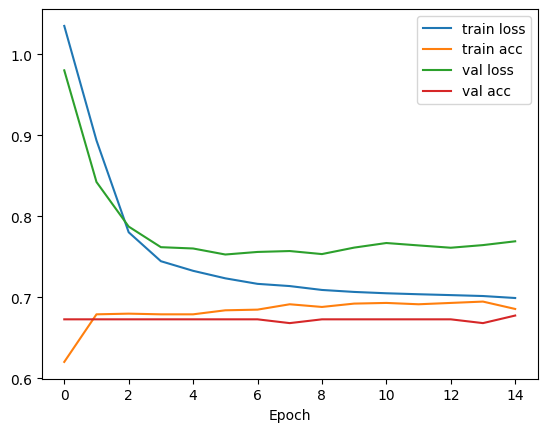

In [29]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_loss'], label='val loss')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [30]:
loss, acc = classifier1D.evaluate(test_X, test_y_cls)
print(f'Loss={loss}, Acc={acc}')

15/15 [==============================] - 0s 5ms/step - loss: 0.7709 - accuracy: 0.6737
Loss=0.7708932757377625, Acc=0.6736842393875122


Como vemos, el resultado no es brillante (alrededor de un 67% de acierto al determinar la clase), pero podemos observar cómo el sistema efectivamente aprende con los datos.

Posibles pruebas adicionales:
- Explorar métricas adicionales, ver si alguna clase se predice peor que las demás.
- Regularización L1/L2
- Dropout
- Mayor complejidad de la red
- Recoger más datos (o hacer data augmentation con sentido)

Regresión datos tabulares

In [31]:
mm_scaler = MinMaxScaler()

train_y_reg = mm_scaler.fit_transform(
    ground_truth.loc[train_idx].values.reshape(-1, 1))
val_y_reg = mm_scaler.transform(
    ground_truth.loc[val_idx].values.reshape(-1, 1))
test_y_reg = mm_scaler.transform(
    ground_truth.loc[test_idx].values.reshape(-1, 1))

train_y_reg.shape, val_y_reg.shape, test_y_reg.shape

((1209, 1), (214, 1), (475, 1))

In [39]:
print(f"Input size: {data.shape[1]}")

nb_out = train_y_reg.shape[1]
regressor1D = Sequential()
regressor1D.add(Dense(64, input_shape=(data.shape[1],), activation='relu'))
regressor1D.add(Dense(32, activation='relu'))
regressor1D.add(Dense(8, activation='relu'))
regressor1D.add(Dense(nb_out, activation='linear'))

regressor1D.compile(loss='mean_squared_error', optimizer='adam')
regressor1D.summary()

Input size: 32
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4465 (17.44 KB)
Trainable params: 4465 (17.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
EPOCHS = 50
BS = 32

H = regressor1D.fit(x=train_X, y=train_y_reg, batch_size=BS, epochs=EPOCHS,
          validation_data=(val_X, val_y_reg), shuffle=True, verbose=1)

Epoch 1/50
38/38 [==============================] - 3s 13ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 3/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 4/50
38/38 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 7/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 10/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 11/50
3

[]

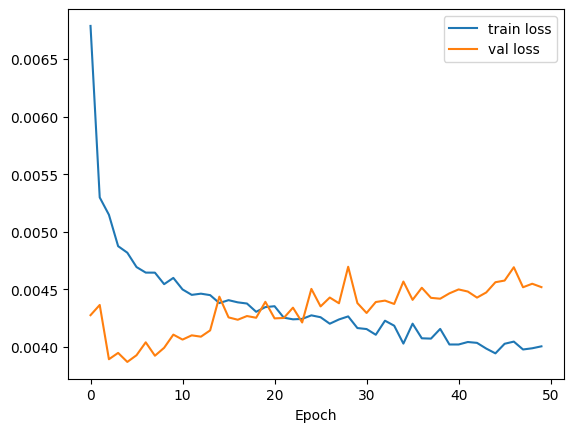

In [41]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [42]:
loss = regressor1D.evaluate(test_X, test_y_reg)
rho = spearmanr(test_y_reg, regressor1D.predict(test_X))[0]
print(f'Loss (MSE)={loss:.3f}, Spearman Rank Correlation Coefficient={rho:.3f}')

15/15 [==============================] - 0s 2ms/step
Loss (MSE)=0.010, Spearman Rank Correlation Coefficient=0.570


15/15 [==============================] - 0s 2ms/step


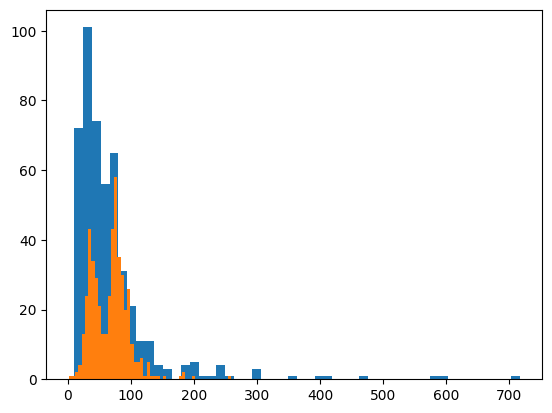

In [43]:
test_prices = ground_truth.loc[test_idx]
raw_preds = regressor1D.predict(test_X)
rescaled_preds = mm_scaler.inverse_transform(raw_preds)

plt.hist(test_prices, bins=50)
plt.hist(rescaled_preds, bins=50)
plt.show()

diferencia evidente entre distribución de precios reales en azul y predicciones en naranja. Aun el modelo no analiza bien los precios.

Clasificación imágenes

In [50]:
input_shape = images[0].shape
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [51]:
for layer in base_resnet.layers:
  layer.trainable = False

DROPOUT = 0.5
nb_out = train_y_cls.shape[1]
last = base_resnet.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(DROPOUT)(x)
x = Dense(nb_out, activation='softmax', name='predictions')(x)
classifier2D = Model(base_resnet.input, x)

optim = Adam(learning_rate=1e-4)
classifier2D.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
classifier2D.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [52]:
EPOCHS = 20
BS = 128

H = classifier2D.fit(images[train_idx], train_y_cls, batch_size=BS,
                 validation_data=(images[val_idx], val_y_cls), epochs=EPOCHS,
                 shuffle=True, verbose=1)

Epoch 1/20
10/10 [==============================] - 10s 651ms/step - loss: 1.2976 - accuracy: 0.3482 - val_loss: 1.0875 - val_accuracy: 0.4486
Epoch 2/20
10/10 [==============================] - 5s 487ms/step - loss: 1.2497 - accuracy: 0.4111 - val_loss: 1.0726 - val_accuracy: 0.4486
Epoch 3/20
10/10 [==============================] - 4s 425ms/step - loss: 1.1922 - accuracy: 0.3615 - val_loss: 1.0669 - val_accuracy: 0.4486
Epoch 4/20
10/10 [==============================] - 4s 436ms/step - loss: 1.1929 - accuracy: 0.3871 - val_loss: 1.0593 - val_accuracy: 0.4486
Epoch 5/20
10/10 [==============================] - 4s 434ms/step - loss: 1.1441 - accuracy: 0.4003 - val_loss: 1.0578 - val_accuracy: 0.4486
Epoch 6/20
10/10 [==============================] - 5s 506ms/step - loss: 1.1406 - accuracy: 0.3970 - val_loss: 1.0566 - val_accuracy: 0.4486
Epoch 7/20
10/10 [==============================] - 5s 505ms/step - loss: 1.1387 - accuracy: 0.3888 - val_loss: 1.0550 - val_accuracy: 0.4486
Epoch

[]

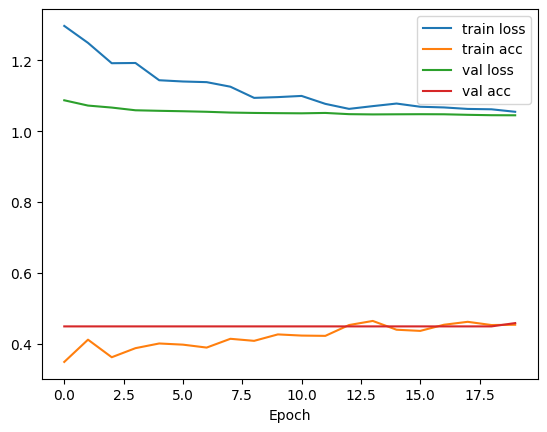

In [55]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_loss'], label='val loss')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [56]:
loss, acc = classifier2D.evaluate(images[test_idx], test_y_cls)
print(f'Loss={loss}, Acc={acc}')

15/15 [==============================] - 2s 98ms/step - loss: 1.0577 - accuracy: 0.4505
Loss=1.0576517581939697, Acc=0.45052632689476013


parece que poco a poco va aprendiendo


Regresión sobre imágenes

In [58]:
DROPOUT = 0.5
nb_out = train_y_reg.shape[1]
last = base_resnet.layers[-1].output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(DROPOUT)(x)
x = Dense(nb_out, activation='linear', name='predictions')(x)
regressor2D = Model(base_resnet.input, x)

regressor2D.compile(optimizer='adam', loss='mean_squared_error')
regressor2D.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [59]:
EPOCHS = 25
BS = 32

H = regressor2D.fit(x=images[train_idx], y=train_y_reg, batch_size=BS, epochs=EPOCHS,
          validation_data=(images[val_idx], val_y_reg), shuffle=True, verbose=1)

Epoch 1/25
38/38 [==============================] - 12s 244ms/step - loss: 0.4046 - val_loss: 0.0108
Epoch 2/25
38/38 [==============================] - 4s 118ms/step - loss: 0.0146 - val_loss: 0.0053
Epoch 3/25
38/38 [==============================] - 5s 136ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 4/25
38/38 [==============================] - 5s 134ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 5/25
38/38 [==============================] - 4s 116ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 6/25
38/38 [==============================] - 4s 117ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 7/25
38/38 [==============================] - 4s 115ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 8/25
38/38 [==============================] - 5s 131ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 9/25
38/38 [==============================] - 4s 114ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 10/25
38/38 [==============================] - 4s 113ms/step - loss: 0.0064 - val_loss: 0.005

[]

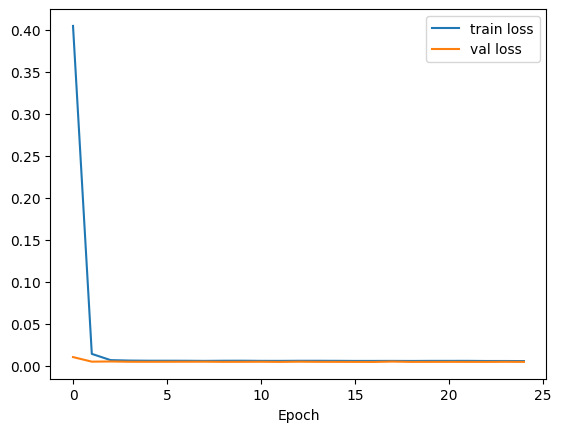

In [60]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [61]:
loss = regressor2D.evaluate(images[test_idx], test_y_reg)
rho = spearmanr(test_y_reg, regressor2D.predict(images[test_idx]))[0]
print(f'Loss (MSE)={loss:.3f}\nSpearman Rank Correlation Coefficient={rho:.3f}')

15/15 [==============================] - 2s 95ms/step
Loss (MSE)=0.010
Spearman Rank Correlation Coefficient=0.223


15/15 [==============================] - 1s 96ms/step


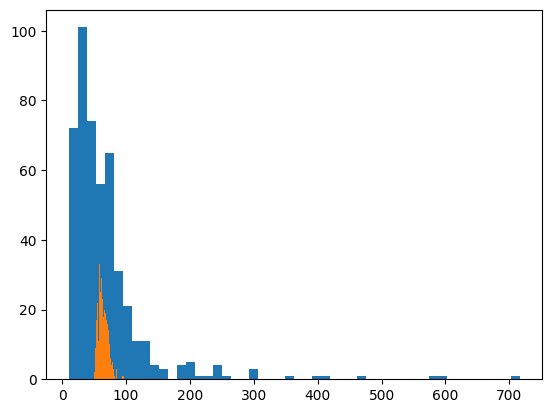

In [62]:
test_prices = ground_truth.loc[test_idx]
raw_preds = regressor2D.predict(images[test_idx])
rescaled_preds = mm_scaler.inverse_transform(raw_preds)

plt.hist(test_prices, bins=50)
plt.hist(rescaled_preds, bins=50)
plt.show()

No aprende ni entiende, pero el modo principal es corresponde con los datos reales

Combinación de fuentes

El modelo basado en imégenes le cuesta, veamos ahora en convinación con datos categóricos, para que entre los dos se corrijan mutuamente.


1 - Late-Fusion (predicciones 1D + predicciones 2D)

In [63]:
late_1d_train = classifier1D.predict(train_X)
late_1d_val = classifier1D.predict(val_X)
late_1d_test = classifier1D.predict(test_X)

print(late_1d_train.shape)

15/15 [==============================] - 0s 2ms/step
(1209, 3)


In [64]:
late_2d_train = classifier1D.predict(train_X)
late_2d_val = classifier1D.predict(val_X)
late_2d_test = classifier1D.predict(test_X)

print(late_2d_train.shape)

15/15 [==============================] - 0s 3ms/step
(1209, 3)


In [65]:
from sklearn.svm import SVC

late_train_feats = numpy.concatenate((late_1d_train, late_2d_train), axis=1)
late_val_feats = numpy.concatenate((late_1d_val, late_2d_val), axis=1)
late_test_feats = numpy.concatenate((late_1d_test, late_2d_test), axis=1)

fusion_labels_train = numpy.concatenate(
    (y_class.loc[train_idx], y_class.loc[val_idx]))
fusion_labels_test = y_class.loc[test_idx]

late_fuser = SVC(random_state=1234)
late_fuser.fit(X=numpy.concatenate((late_train_feats, late_val_feats)),
               y=fusion_labels_train)
acc_late = late_fuser.score(X=late_test_feats, y=fusion_labels_test)
print(f"Late fusion achieves {acc_late:0.3f} accuracy")

Late fusion achieves 0.676 accuracy


2 - Early-Fusion (representación 1D + representación 2D)

In [66]:
early_1d_train = numpy.concatenate((train_X, val_X), axis=0)
early_1d_train.shape

(1423, 32)

In [67]:
last_conv = classifier2D.layers[-3].output
feature_extractor = Model(classifier2D.input, last_conv)
feature_extractor.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [68]:
early_2d_train = feature_extractor.predict(images[train_idx])
early_2d_val = feature_extractor.predict(images[val_idx])
early_2d_test = feature_extractor.predict(images[test_idx])

print(early_2d_train.shape)

15/15 [==============================] - 1s 89ms/step
(1209, 256)


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
early_2d_train_pca = pca.fit_transform(early_2d_train)
early_2d_val_pca = pca.transform(early_2d_val)
early_2d_test_pca = pca.transform(early_2d_test)

early_2d_train_pca.shape

(1209, 50)

Combinamos tabular + features-PCA

In [70]:
early_train_feats = numpy.concatenate(
    (early_1d_train, numpy.concatenate((early_2d_train_pca, early_2d_val_pca))),
    axis=1)
early_test_feats = numpy.concatenate((test_X, early_2d_test_pca), axis=1)

early_fuser = SVC(random_state=1234)
early_fuser.fit(X=early_train_feats, y=fusion_labels_train)
acc_early = early_fuser.score(X=early_test_feats, y=fusion_labels_test)
print(f"Late fusion achieves {acc_early:0.3f} accuracy")

Late fusion achieves 0.676 accuracy
